# K-Nearest Method

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [5]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

In [6]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
1 = Basic service
2 = e-sevrice 
3= plus service
4= total service
custcat dependent , diğer veriler independent value

In [7]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

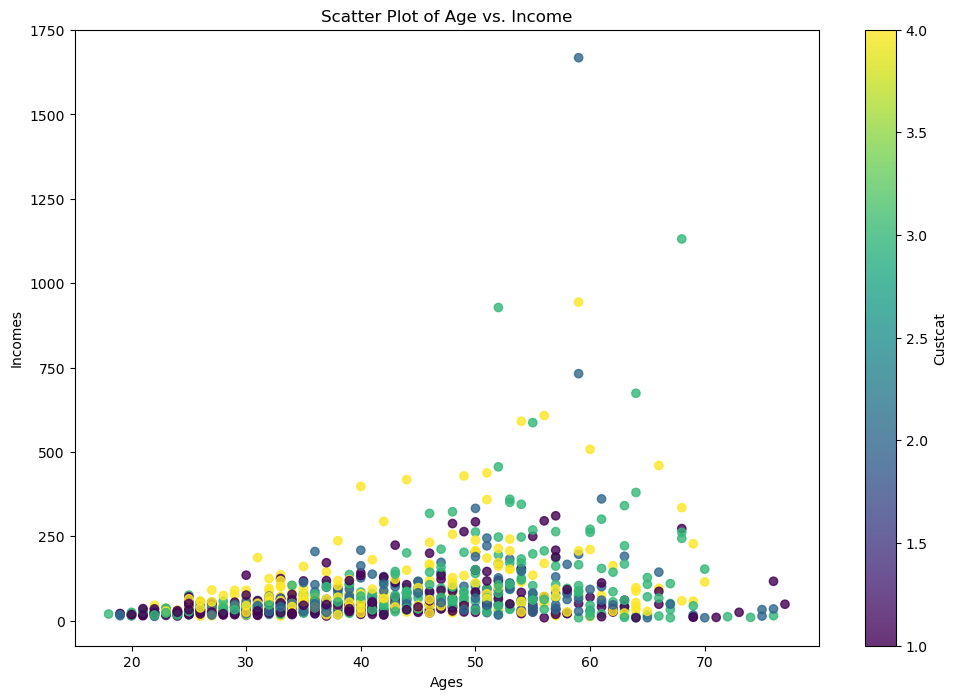

In [29]:
plt.rcParams['figure.figsize'] = (12, 8)

# Scatter plot for income vs age, color-coded by a numeric value (e.g., 'custcat')
plt.scatter(df.age, df.income, c=df.custcat, cmap='viridis', alpha=0.8)
plt.xlabel("Ages")
plt.ylabel("Incomes")
plt.title("Scatter Plot of Age vs. Income")
plt.colorbar(label="Custcat")  # Adding a colorbar for reference
plt.show()

In [16]:
import seaborn as sns

<Axes: xlabel='age', ylabel='income'>

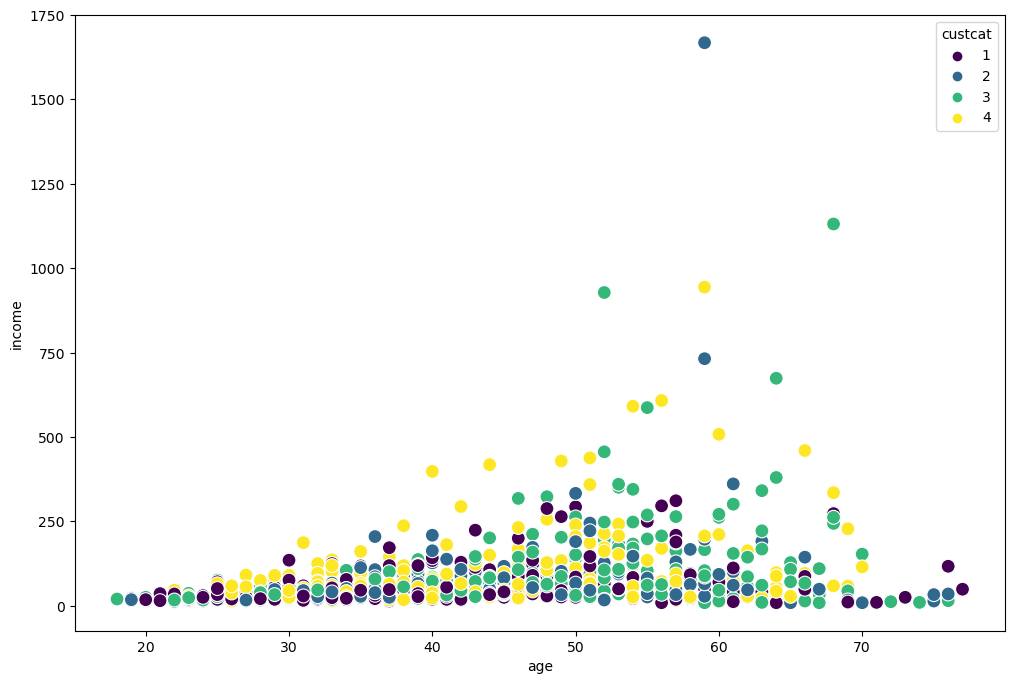

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x ="age", y="income", hue="custcat", data=df , palette="viridis", s=100)

1- Pick a value for K.(key value)
2-Calculate the distance of unknown case from all cases.(dissimilarity)
3-Select the K-observation in the training data that are "nearest.
4-Predict the response of the unknown data point, using the most popular response value from the K-nearest neigbors.

For unkown case, first pick K=1
calculate and make prediction until K=20
Compare results.
- K=1 may capture the noise in data. A low value of K causes over-fitting. Prediction is not good enough for out-of-sample-cases.
-K=20 The model becomes overly generalized, if value of K is too hight.

- if we use 2 features(age,income), we are using it in a 2-dimensinol space.
-We can also use the same distance matrix for multi-dimensional vectors.

# Exercise 
- Normalize the data: StandarScaler
-Classification: KNeighborsClassifier
-Training: k=4 
-Evaluation: accuracy_score()

In [54]:
# 1- Pick a value for K.(key value)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [84]:
X = df.drop("custcat", axis=1)
y=df["custcat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
k_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
best_k =None 
best_accuracy=0
for k in k_values:
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred=knn_model.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k =k
print(f"En iyi K değeri: {best_k}, Doğruluk: {best_accuracy}")

En iyi K değeri: 18, Doğruluk: 0.375


# Another solutıon I write

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [71]:
#Split the data into featuers(X) and target(Y)
X = df.drop("custcat", axis=1)
y=df["custcat"]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Scale the features using StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [72]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [73]:
y_pred = knn.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.385


In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [135]:
# Using Cross Validation to Get the Best Value of k
k_values = [i for i in range (1,30)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

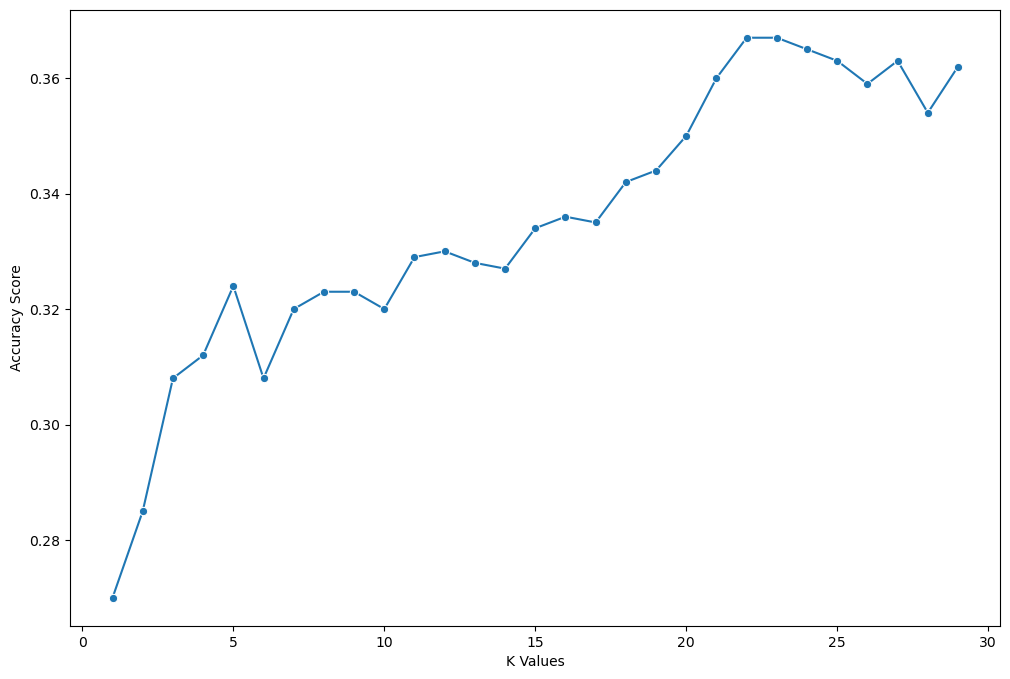

In [136]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

## Solutıon exercise


In [85]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [87]:
X=df[["region","tenure",'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]

In [94]:
X[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [106]:
y=df["custcat"].values

In [107]:
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [112]:
from sklearn import preprocessing
#Normalize Data
X =preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [113]:
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# train/test split

In [114]:
#train/test split

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)


In [115]:
print("Train set:" , X_train.shape , y_train.shape)
print("test set: ", X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
test set:  (200, 11) (200,)


# classification

In [116]:
k=4 
print("Train set:" , X_train.shape , y_train.shape)
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)


Train set: (800, 11) (800,)


In [117]:
neigh

KNeighborsClassifier(n_neighbors=4)

# prediction

In [118]:
y_hat= neigh.predict(X_test)
y_hat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

# Accuracy Evaluation 

In [121]:
from sklearn import metrics
print("train set accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test,y_hat))

train set accuracy:  0.5475
Test set accuracy:  0.32


In [128]:
#Check other Ks
k= 6 
neigh6 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat6 = neigh6.predict(X_test)
print("train set accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test,y_hat))

train set accuracy:  0.51625
Test set accuracy:  0.32


Müşteri bilgilerini alarak tahmin de ekledim isteyen bakabilir: musteri_bilgileri=[2, 13, 44, 1, 9, 64.0, 4, 5, 0.0, 0, 2]
#normalizasyon:
musteri_bilgileri_norm = StandardScaler().fit_transform(np.array(musteri_bilgileri).reshape(1, -1))
predict_custcat=knn.predict(musteri_bilgileri_norm)
print("Tahmin Sonucu: ", predict_custcat)

# # Check accuracy of Ks

In [130]:
Ks =10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
for n in range(1,Ks):
    # train and prediction for each k
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    y_hat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,y_hat)
    std_acc[n-1] = np.std(y_hat == y_test) / np.sqrt(y_hat.shape[0])

In [131]:
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])